In [3]:
import numpy as np
from numpy import cos, sin, pi
import matplotlib.pyplot as plt
from numba import jit, njit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FFMpegWriter
import time

In [4]:
G = 6.67e-10

In [16]:
def galaxy_init(n, offset = 0, theta = 0, axis = 2):
    
    # Initialize mass array
    m = np.random.randint(low = 1, high = 100, size = (n, 1))
    
    # Initialize disk
    n_disk = int(0.8 * n)
#     r_disk = np.random.randint(low = -n/5., high = n/5., size = (3, n_disk))
    r_disk = np.random.randn(3, n_disk) * 200
    r_disk[2] = r_disk[2] * 0.05

    # Initialize bulge
#     r_bulge = np.random.randint(low = -n/50., high = n/50., size = (3, n - n_disk))
    r_bulge = np.random.randn(3, n - n_disk) * 50
    
    # Initialize position array with offset and rotation
    r = np.concatenate((r_disk.T, r_bulge.T))
    r += offset
    if axis == 0:
        rotation = np.array([[1,0,0],[0,cos(theta),-sin(theta)],[0,sin(theta),cos(theta)]])
    elif axis == 1:
        rotation = np.array([[cos(theta),0,-sin(theta)],[0,1,0], [sin(theta),0,cos(theta)]])
    else:    
        rotation = np.array([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])
    r = [np.matmul(rotation, r[i]) for i in range(len(r))]
    r = np.vstack(r)
#     r = np.random.randn(3,n) * n/5
#     r[2] *= 0.05
#     r = r.T

    # Calculate angular velocity
    M = sum(m[:,0])
    mu = M * m / (M + m)
    center_of_mass = np.sum(r * m, axis = 0) / M
    w = np.sqrt(G * M * m / (mu * np.linalg.norm(r - center_of_mass)**3)) * 10
    w = [np.matmul(rotation, np.array([0,0,w[i]])) for i in range(len(w))]
#     w = [np.array([0,0,w[i]]) for i in range(len(w))]

    # Initialize velocity
    v = np.cross(w, r)
    
    return r,v,m,M

In [17]:
@jit(nopython=True)
def update(r, v, m):
    
    r_new = r[:]
    v_new = v[:]
    for i in range(len(r)):
        a = np.zeros(3)
        for j in range(len(r)):
            if j != i:
                dist = r[i] - r[j]
                denom = ((dist[0]**2 + dist[1]**2 + dist[2]**2)**0.5)**3
                threshold = 0.05
                if denom < threshold:
                    denom = threshold
                a += -G * m[j] / denom * (dist)
#         a += -G * M /        
                
        r_new[i] = r[i] + dt * v[i] + 0.5 * a * dt**2
        v_new[i] = v[i] + dt * a
    return r_new, v_new

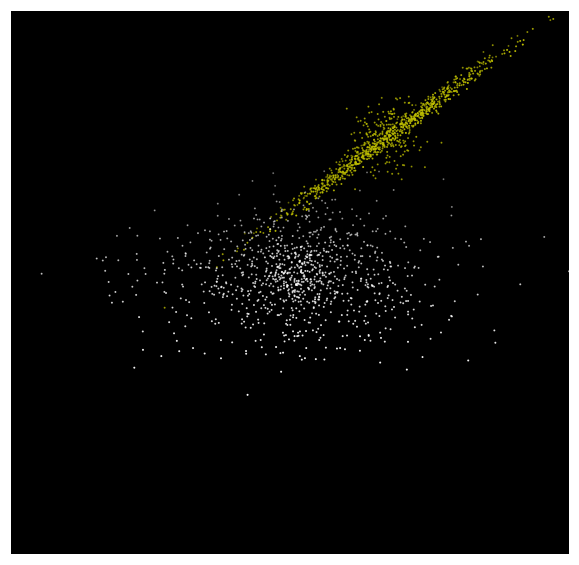

In [18]:
count=0
N = 1000
r1,v1,m1,M1 = galaxy_init(N)
r2,v2,m2,M2 = galaxy_init(N, offset = np.array((300,300,150)), theta = pi/4, axis=1)

s = 0.00001

v1 += np.array((0,0,s))
v2 += np.array((-s,-s,-s))

r = np.concatenate((r1,r2))
v = np.concatenate((v1,v2))
m = np.concatenate((m1,m2))

lims = 400

fig = plt.figure(frameon=False, figsize = (10,10))
ax = fig.gca(projection = '3d')
    
ax.grid(b=False)
ax.set_axis_off()
ax.set_facecolor('k')
ax.set_xlim(-lims,lims)
ax.set_ylim(-lims,lims)
ax.set_zlim(-lims,lims)
ax.scatter3D(r[:N,0], r[:N,1], r[:N,2], c='w', s=1)
ax.scatter3D(r[N:,0], r[N:,1], r[N:,2], c='y', s=1)
plt.show()

0 1.439126968383789
10 16.118077993392944
20 30.196423768997192
30 44.298731327056885
40 58.07126498222351
50 72.14959907531738
60 86.43179821968079
70 100.64905881881714
80 114.85831117630005
90 129.0016040802002
100 142.79710578918457
110 157.11729073524475
120 171.24559354782104
130 185.36589694023132
140 199.33930039405823
150 213.30670380592346
160 227.5119652748108
170 241.67424130439758
180 255.85351371765137
190 269.6030559539795
200 283.7803225517273
210 298.0545423030853
220 312.22980999946594
230 325.98134756088257
240 340.2105875015259
250 354.4648129940033
260 368.62409710884094
270 382.6014931201935
280 396.6968231201172
290 410.92605900764465
300 425.13032126426697
310 439.47148156166077
320 453.29198002815247
330 467.51223278045654
340 481.7594690322876
350 495.97670435905457
360 509.665278673172
370 523.9115154743195
380 538.131756067276
390 552.344007730484
400 566.3933591842651
410 580.4397132396698
420 594.776894569397
430 609.0441131591797
440 623.394279718399
450 

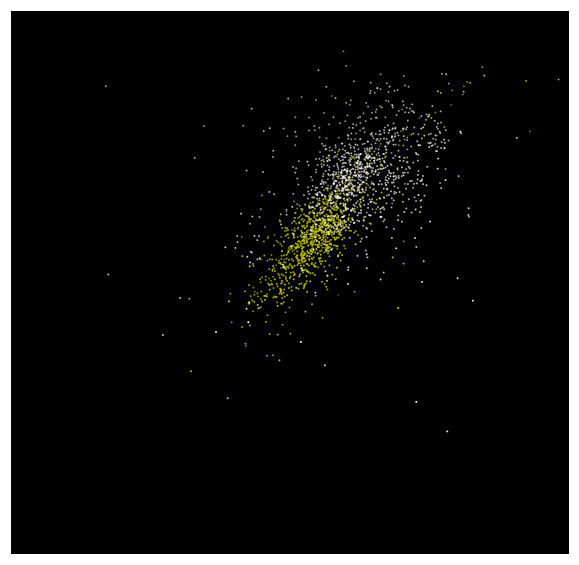

In [20]:
# N = 500
# r,v,m = box_init(N)
# lims = 1010

steps = 1800
dt = 1000

start = time.time()
fig = plt.figure(frameon=False, figsize = (10,10))
ax = fig.gca(projection = '3d')
    
ax.grid(b=False)
ax.set_axis_off()
ax.set_facecolor('k')
ax.set_xlim(-lims,lims)
ax.set_ylim(-lims,lims)
ax.set_zlim(-lims,lims)
ax.scatter3D(r[:N,0], r[:N,1], r[:N,2], c='w', s=1)
ax.scatter3D(r[N:,0], r[N:,1], r[N:,2], c='y', s=1)
#     img, =  ax.plot(r[:2000,0], r[:2000,1], r[:2000,2], 'yo', alpha = 0.6, ms = 0.25, ls = '')
#     img2, = ax.plot(r[2000:,0], r[2000:,1], r[2000:,2], marker = 'o', color = 'purple', alpha = 0.6, ms = 0.25, ls = '')
# ax.set_title(0)
for step in range(steps):
    r, v = update(r, v, m)
    fig.clf()
    ax = fig.gca(projection = '3d')
    
    ax.grid(b=False)
    ax.set_axis_off()
    ax.set_facecolor('k')
    ax.set_xlim(-lims,lims)
    ax.set_ylim(-lims,lims)
    ax.set_zlim(-lims,lims)
    ax.scatter3D(r[:N,0], r[:N,1], r[:N,2], c='w', s=1)
    ax.scatter3D(r[N:,0], r[N:,1], r[N:,2], c='y', s=1)
#         ax.plot(r[:2000,0], r[:2000,1], r[:2000,2], 'yo', alpha = 0.6, ms = 0.25, ls = '')
#         ax.plot(r[2000:,0], r[2000:,1], r[2000:,2], marker = 'o', color = 'purple', alpha = 0.6, ms = 0.25, ls = '')
#     ax.view_init(elev = step/3, azim = step/3)
#     ax.view_init(elev = 90)
#     ax.set_title(step)
    count +=1
    name = 'Movie5\\frame_' + str(count).zfill(4) + '.png'
    plt.savefig(name, bbox_inches='tight')
    if step%10 == 0:
        print(step, time.time() - start)
    if step%100 == 0:
        np.savetxt('positions.csv', r, delimiter = ',')
        np.savetxt('velocities.csv', v, delimiter = ',')
        np.savetxt('masses.csv', m, delimiter = ',')

In [8]:
r5 = np.loadtxt('positions.csv', delimiter = ',')

In [9]:
r5

array([[ 291.37863012, -719.02650196,    3.32727904],
       [ 217.84388637, -667.35686253,  -57.99494042],
       [-362.36487952,  141.73202355,   14.92959697],
       ...,
       [ 395.47498851, 1444.20045246, 1766.73680455],
       [ 503.36311301, 1587.56089813, 1493.66046216],
       [ 570.12529855, 1030.06527201, 1548.01073066]])